In [1]:
#%matplotlib notebook

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import gmaps

from api_keys import g_key
gmaps.configure(api_key=g_key)


In [100]:
objects='MetObjects_Cleaned3.csv'
object_df=pd.read_csv(objects)
object_df

,Object Number,Object ID,Department,AccessionYear,Years Object at Met,Object Name,Title,Culture,Artist Display Name,Artist Nationality,...,Country,Region,Object Type ID,Object Type,Sub Classification 1,Sub Classification 2,Rights and Reproduction,Link Resource,Object Wikidata URL,Tags
0,16.74.49,15,The American Wing,1916,105,Coin,"Coin, 1/2 Real",Mexican,NaN,NaN,...,Mexico,NaN,33,Silver,None,None,NaN,http://www.metmuseum.org/art/collection/search/15,NaN,NaN
1,16.74.27,16,The American Wing,1916,105,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,...,Mexico,NaN,22,Metal,None,None,NaN,http://www.metmuseum.org/art/collection/search/16,NaN,NaN
2,16.74.28,17,The American Wing,1916,105,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,...,Mexico,NaN,22,Metal,None,None,NaN,http://www.metmuseum.org/art/collection/search/17,NaN,NaN
3,16.74.29,18,The American Wing,1916,105,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,...,Mexico,NaN,22,Metal,None,None,NaN,http://www.metmuseum.org/art/collection/search/18,NaN,NaN
4,16.74.30,19,The American Wing,1916,105,Peso,"Coin, 1/4 Peso",Mexican,NaN,NaN,...,Mexico,NaN,22,Metal,None,None,NaN,http://www.metmuseum.org/art/collection/search/19,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29313,2020.64.151,839285,The American Wing,2020,1,Pitcher,"""Animal Kingdom"" cream pitcher",American,American Limoges China Company|Viktor Schrecke...,NaN,...,United States,NaN,7,Ceramics,None,None,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN
29314,2020.64.152,839286,The American Wing,2020,1,Bowl,"""Animal Kingdom"" sugar bowl",American,Viktor Schreckengost|American Limoges China Co...,NaN,...,United States,NaN,7,Ceramics,None,None,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN
29315,2020.64.153,839287,The American Wing,2020,1,Platter,"""Animal Kingdom"" small platter",American,Viktor Schreckengost|American Limoges China Co...,NaN,...,United States,NaN,7,Ceramics,None,None,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN
29316,2020.66,839896,"Arts of Africa, Oceania, and the Americas",2020,1,Cloak,Cloak (Kaitaka aronui),Maori people,NaN,NaN,...,New Zealand,NaN,10,Costumes,Textiles,None,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN


In [101]:
object_df.dtypes

Object Number              object
Object ID                   int64
Department                 object
AccessionYear               int64
Years Object at Met         int64
Object Name                object
Title                      object
Culture                    object
Artist Display Name        object
Artist Nationality         object
Artist Begin Date          object
Artist End Date            object
Object Begin Date           int64
Century Object Begin        int64
Object End Date             int64
Century Object End Date     int64
Object Age                  int64
Credit Line                object
City                       object
State                      object
County                     object
Country ID                  int64
Country                    object
Region                     object
Object Type ID              int64
Object Type                object
Sub Classification 1       object
Sub Classification 2       object
Rights and Reproduction    object
Link Resource 

In [102]:
country_grp=object_df.groupby('Country')
country_df=country_grp.count()
country_df

,Object Number,Object ID,Department,AccessionYear,Years Object at Met,Object Name,Title,Culture,Artist Display Name,Artist Nationality,...,Country ID,Region,Object Type ID,Object Type,Sub Classification 1,Sub Classification 2,Rights and Reproduction,Link Resource,Object Wikidata URL,Tags
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,35,35,35,35,35,35,35,35,0,0,...,35,1,35,35,35,35,0,35,0,0
Algeria,28,28,28,28,28,28,28,28,0,0,...,28,10,28,28,28,28,0,28,0,0
America,256,256,256,256,256,256,256,256,254,32,...,256,252,256,256,256,256,0,256,1,45
Angola,36,36,36,36,36,36,36,36,0,0,...,36,8,36,36,36,36,0,36,1,25
Australia,68,68,68,68,68,68,68,68,2,0,...,68,40,68,68,68,68,0,68,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Turkey,57,57,57,57,57,57,57,57,2,2,...,57,0,57,57,57,57,0,57,0,0
United Kingdom,193,193,193,193,193,193,193,193,116,60,...,193,3,193,193,193,193,0,193,3,5
United States,9202,9202,9202,9202,9202,9202,9202,9202,5819,1658,...,9202,409,9202,9202,9202,9202,54,9202,371,2150


In [103]:
# drops the united states for better scaling of chart
remove_usa = country_df.drop(country_df.index[70])
remove_usa

,Object Number,Object ID,Department,AccessionYear,Years Object at Met,Object Name,Title,Culture,Artist Display Name,Artist Nationality,...,Country ID,Region,Object Type ID,Object Type,Sub Classification 1,Sub Classification 2,Rights and Reproduction,Link Resource,Object Wikidata URL,Tags
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,35,35,35,35,35,35,35,35,0,0,...,35,1,35,35,35,35,0,35,0,0
Algeria,28,28,28,28,28,28,28,28,0,0,...,28,10,28,28,28,28,0,28,0,0
America,256,256,256,256,256,256,256,256,254,32,...,256,252,256,256,256,256,0,256,1,45
Angola,36,36,36,36,36,36,36,36,0,0,...,36,8,36,36,36,36,0,36,1,25
Australia,68,68,68,68,68,68,68,68,2,0,...,68,40,68,68,68,68,0,68,1,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tibet,35,35,35,35,35,35,35,35,1,0,...,35,0,35,35,35,35,0,35,2,4
Turkey,57,57,57,57,57,57,57,57,2,2,...,57,0,57,57,57,57,0,57,0,0
United Kingdom,193,193,193,193,193,193,193,193,116,60,...,193,3,193,193,193,193,0,193,3,5


In [104]:
obj_chart_df=remove_usa["Object ID"]
obj_chart_df

Country
Afghanistan        35
Algeria            28
America           256
Angola             36
Australia          68
                 ... 
Tibet              35
Turkey             57
United Kingdom    193
Vanuatu            66
italy               1
Name: Object ID, Length: 72, dtype: int64

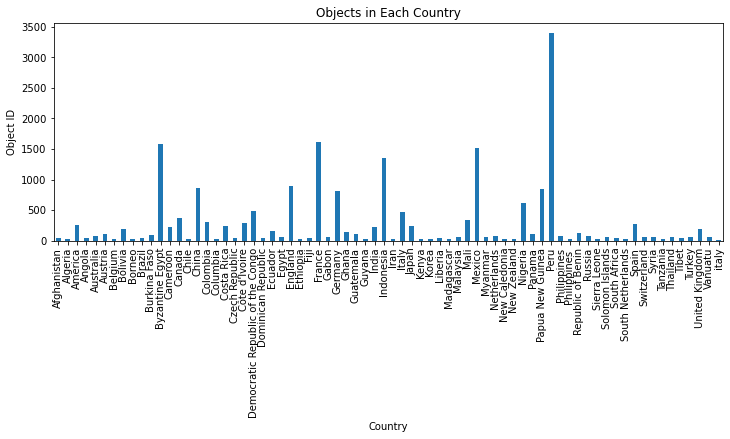

In [105]:
# country_grp=object_df.groupby('Country')
# num_obj=country_grp['Object ID'].count()

# drops the united states for better scaling of chart
# num_obj = num_obj.drop(num_obj.index[70])
# num_obj


#Chart number of objects per country (excluding USA)
obj_chart = obj_chart_df.plot(kind="bar", title="Objects in Each Country",figsize=(12,4))
obj_chart.set_xlabel("Country")
obj_chart.set_ylabel("Object ID")

plt.show()
plt.tight_layout()
plt.close()

In [106]:
#Data Set Summary

# Calculate the total number of countries
total_country = len(object_df["Country ID"].unique())

# Calculate the total number of objects
total_objects = len(object_df["Object ID"].unique())

# Calculate the total number object types
total_object_types = len(object_df["Object Type ID"].unique())

# Calculate the average number objects per country
object_per_country = total_objects/total_country

# Calculate the average age of objects
object_avg_age = object_df["Object Age"].mean()

# Calculate the median age of objects
object_med_age = object_df["Object Age"].median()

# Calculate the average number of years objects at The Met
avg_years_at_met = object_df["Years Object at Met"].mean()

# Calculate the median number of years objects at The Met
med_years_at_met = object_df["Years Object at Met"].median()

# Create a dataframe to hold the above results
summary_df =  pd.DataFrame({"Total Countries":[total_country],
                                 "Total Objects":[total_objects],
                                  "Total Object Types":[total_object_types],
                                  "Avg Number Objects per Country":[object_per_country],                                  
                                  "Avg Age of Objects":[object_avg_age],
                                  "Median Age of Objects":[object_med_age],  
                                  "Avg Years Object at Met":[avg_years_at_met],
                                  "Median Years Object at Met":[med_years_at_met],
                                 })

# Give the displayed data cleaner formatting
summary_df['Total Countries'] = summary_df['Total Countries'].map("{:,}".format)
summary_df['Total Objects'] = summary_df['Total Objects'].map("{:,}".format)
summary_df['Total Object Types'] = summary_df['Total Object Types'].map("{:,}".format)
summary_df['Avg Number Objects per Country'] = summary_df['Avg Number Objects per Country'].map("{:,.2f}".format)
summary_df['Avg Age of Objects'] = summary_df['Avg Age of Objects'].map("{:,.2f}".format)
summary_df['Median Age of Objects'] = summary_df['Median Age of Objects'].map("{:,.2f}".format)
summary_df['Avg Years Object at Met'] = summary_df['Avg Years Object at Met'].map("{:,.2f}".format)
summary_df['Median Years Object at Met'] = summary_df['Median Years Object at Met'].map("{:,.2f}".format)

summary_df

,Total Countries,Total Objects,Total Object Types,Avg Number Objects per Country,Avg Age of Objects,Median Age of Objects,Avg Years Object at Met,Median Years Object at Met
0,72,"29,318",39,407.19,572.99,221.00,63.02,54.00


In [107]:
# Top ten object types by number of objects
objects_grp=object_df.groupby('Object Type')
top_objects=objects_grp.count().nlargest(10, 'Object ID')
top_objects

,Object Number,Object ID,Department,AccessionYear,Years Object at Met,Object Name,Title,Culture,Artist Display Name,Artist Nationality,...,Country ID,Country,Region,Object Type ID,Sub Classification 1,Sub Classification 2,Rights and Reproduction,Link Resource,Object Wikidata URL,Tags
Object Type,,,,,,,,,,,,,,,,,,,,,
Musical Instrument,3891,3891,3891,3891,3891,3891,3891,3891,1017,514,...,3891,3891,162,3891,3891,3891,0,3891,79,380
Ceramics,3890,3890,3890,3890,3890,3890,3890,3890,1573,252,...,3890,3890,15,3890,3890,3890,15,3890,113,2140
Sculpture,2990,2990,2990,2990,2990,2990,2990,2990,314,60,...,2990,2990,1019,2990,2990,2990,1,2990,124,2437
Textiles,2626,2626,2626,2626,2626,2626,2626,2626,664,152,...,2626,2626,769,2626,2626,2626,8,2626,62,769
Glass,2581,2581,2581,2581,2581,2581,2581,2581,1209,214,...,2581,2581,218,2581,2581,2581,5,2581,176,417
Ornaments,2406,2406,2406,2406,2406,2406,2406,2406,1,0,...,2406,2406,349,2406,2406,2406,0,2406,16,1034
Implements,1803,1803,1803,1803,1803,1803,1803,1803,98,0,...,1803,1803,667,1803,1803,1803,0,1803,1,479
Containers,1574,1574,1574,1574,1574,1574,1574,1574,36,2,...,1574,1574,407,1574,1574,1574,0,1574,12,716
Furniture,1494,1494,1494,1494,1494,1494,1494,1494,583,237,...,1494,1494,99,1494,1494,1494,28,1494,70,206


In [108]:
chart_top_objects=top_objects["Object ID"]
chart_top_objects

Object Type
Musical Instrument    3891
Ceramics              3890
Sculpture             2990
Textiles              2626
Glass                 2581
Ornaments             2406
Implements            1803
Containers            1574
Furniture             1494
Silver                1059
Name: Object ID, dtype: int64

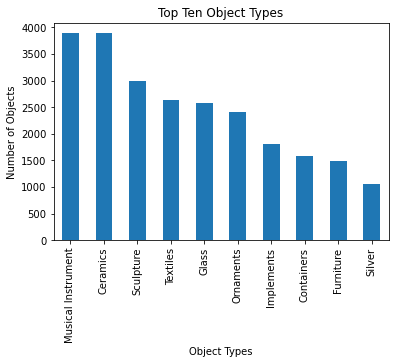

In [109]:
#Chart top ten object types by number of objects
top_obj_chart=chart_top_objects.plot(kind='bar', title="Top Ten Object Types")
top_obj_chart.set_xlabel("Object Types")
top_obj_chart.set_ylabel("Number of Objects")

plt.show()
plt.tight_layout()
plt.close()

In [110]:
#Top ten countires by number of objects
country_grp=object_df.groupby('Country')
top_countries=country_grp.count().nlargest(10, 'Object ID')
top_countries

,Object Number,Object ID,Department,AccessionYear,Years Object at Met,Object Name,Title,Culture,Artist Display Name,Artist Nationality,...,Country ID,Region,Object Type ID,Object Type,Sub Classification 1,Sub Classification 2,Rights and Reproduction,Link Resource,Object Wikidata URL,Tags
Country,,,,,,,,,,,,,,,,,,,,,
United States,9202,9202,9202,9202,9202,9202,9202,9202,5819,1658,...,9202,409,9202,9202,9202,9202,54,9202,371,2150
Peru,3393,3393,3393,3393,3393,3393,3393,3393,4,1,...,3393,230,3393,3393,3393,3393,0,3393,21,1455
France,1613,1613,1613,1613,1613,1613,1613,1613,349,200,...,1613,64,1613,1613,1613,1613,0,1613,144,597
Byzantine Egypt,1579,1579,1579,1579,1579,1579,1579,1579,0,0,...,1579,0,1579,1579,1579,1579,0,1579,0,961
Mexico,1516,1516,1516,1516,1516,1516,1516,1516,24,3,...,1516,1160,1516,1516,1516,1516,0,1516,38,647
Indonesia,1351,1351,1351,1351,1351,1351,1351,1351,193,2,...,1351,586,1351,1351,1351,1351,3,1351,3,378
England,895,895,895,895,895,895,895,895,355,110,...,895,7,895,895,895,895,0,895,13,430
China,854,854,854,854,854,854,854,854,20,1,...,854,2,854,854,854,854,0,854,10,473
Papua New Guinea,844,844,844,844,844,844,844,844,311,0,...,844,341,844,844,844,844,5,844,7,254


In [111]:
chart_top_countries=top_countries["Object ID"]
chart_top_countries

Country
United States       9202
Peru                3393
France              1613
Byzantine Egypt     1579
Mexico              1516
Indonesia           1351
England              895
China                854
Papua New Guinea     844
Germany              815
Name: Object ID, dtype: int64

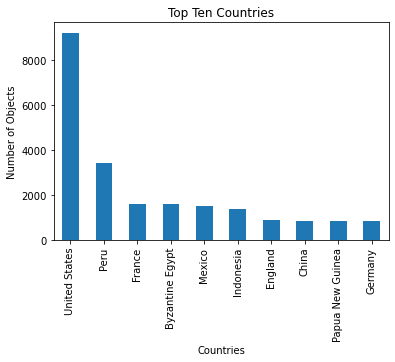

In [112]:
#Chart top ten countries by number of objects
top_countries_chart=chart_top_countries.plot(kind='bar', title="Top Ten Countries")
top_countries_chart.set_xlabel("Countries")
top_countries_chart.set_ylabel("Number of Objects")

plt.show()
plt.tight_layout()
plt.close()

In [113]:
#reads in all countries lat and long according to google
country_ll='country_lat_lng.xlsx'
country_ll_df=pd.read_excel(country_ll)
country_ll_df


,Abv,latitude,longitude,Country
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [114]:
#merge lat lng dataframe to remove_usa df 
map_df = pd.merge(country_df, country_ll_df, on="Country", how="left")
map_df

,Country,Object Number,Object ID,Department,AccessionYear,Years Object at Met,Object Name,Title,Culture,Artist Display Name,...,Object Type,Sub Classification 1,Sub Classification 2,Rights and Reproduction,Link Resource,Object Wikidata URL,Tags,Abv,latitude,longitude
0,Afghanistan,35,35,35,35,35,35,35,35,0,...,35,35,35,0,35,0,0,AF,33.939110,67.709953
1,Algeria,28,28,28,28,28,28,28,28,0,...,28,28,28,0,28,0,0,DZ,28.033886,1.659626
2,America,256,256,256,256,256,256,256,256,254,...,256,256,256,0,256,1,45,NaN,NaN,NaN
3,Angola,36,36,36,36,36,36,36,36,0,...,36,36,36,0,36,1,25,AO,-11.202692,17.873887
4,Australia,68,68,68,68,68,68,68,68,2,...,68,68,68,0,68,1,18,AU,-25.274398,133.775136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Turkey,57,57,57,57,57,57,57,57,2,...,57,57,57,0,57,0,0,TR,38.963745,35.243322
69,United Kingdom,193,193,193,193,193,193,193,193,116,...,193,193,193,0,193,3,5,GB,55.378051,-3.435973
70,United States,9202,9202,9202,9202,9202,9202,9202,9202,5819,...,9202,9202,9202,54,9202,371,2150,US,37.090240,-95.712891
71,Vanuatu,66,66,66,66,66,66,66,66,2,...,66,66,66,0,66,0,19,VU,-15.376706,166.959158


In [115]:
#drop nan values created by the merge
heatmap_df=map_df.dropna(subset=['latitude', 'longitude'])
heatmap_df.head()

,Country,Object Number,Object ID,Department,AccessionYear,Years Object at Met,Object Name,Title,Culture,Artist Display Name,...,Object Type,Sub Classification 1,Sub Classification 2,Rights and Reproduction,Link Resource,Object Wikidata URL,Tags,Abv,latitude,longitude
0,Afghanistan,35,35,35,35,35,35,35,35,0,...,35,35,35,0,35,0,0,AF,33.939110,67.709953
1,Algeria,28,28,28,28,28,28,28,28,0,...,28,28,28,0,28,0,0,DZ,28.033886,1.659626
3,Angola,36,36,36,36,36,36,36,36,0,...,36,36,36,0,36,1,25,AO,-11.202692,17.873887
4,Australia,68,68,68,68,68,68,68,68,2,...,68,68,68,0,68,1,18,AU,-25.274398,133.775136
5,Austria,113,113,113,113,113,113,113,113,45,...,113,113,113,0,113,49,51,AT,47.516231,14.550072


In [116]:
lat_lng=heatmap_df[['latitude','longitude']]
obj_vol=heatmap_df['Object ID']

fig=gmaps.figure(center=(50.0, -35.0), zoom_level=2
)
heat_layer=gmaps.heatmap_layer(lat_lng, weights=obj_vol,
                           dissipating=False,max_intensity=100,
                           point_radius=2)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [142]:
#attempting to filter object type by counrty
type_grp=object_df.groupby(['Country','Object Type'])
type_grp_df=type_grp['Country'].count()#.nlargest(10, 'Object ID')
type_grp_df

Country      Object Type                  
Afghanistan  Musical Instrument                35
Algeria      Musical Instrument                18
             Vessels                           10
America      Musical Instrument                 1
             Textiles                         255
                                             ... 
Vanuatu      Implements                        11
             Musical Instrument                33
             Ornaments                          3
             Sculpture                         16
italy        Manuscripts and Illuminations      1
Name: Country, Length: 556, dtype: int64

In [79]:
# country_df=object_df['Country'].dropna()
# country_df

In [80]:
# country_list=country_df.value_counts()


In [78]:
# unique=object_df['Country'].unique()
# unique

In [77]:
# region_df=object_df['Region'].dropna()
# region_df

In [76]:
# culture_df=object_df['Culture'].dropna()
# culture_df

In [70]:
# culture_list=culture_df.value_counts()
# print(culture_list.unique)

In [71]:
# culture_unique=object_df['Culture'].unique()
# culture_unique

In [72]:
# country_group_df=object_df.groupby(['Country'])
# country_group_df.count().head()

In [73]:


# cln_country_df=object_df.groupby('Country').filter(lambda x: len(x) > 80)
# cln_country_df

In [75]:
# cln_country_list=group_country_df['Counrty'].tolist()
# cln_country_list